# Conjecture on Random Balls

A bag contains several balls, each either red or blue.  At each step $n=1,2,3,\ldots$, we choose a ball uniformly at random from the bag (that is, in such a way that each ball in the bag has equal probability of being chosen).  Then, we put the chosen ball back in the bag __together with a new ball of the same color__.

For example, if the bag initially contains 2 red and 3 blue balls, and if at step 1 we happen to choose one of the 3 blue balls, then after step 1 the bag will contain 2 red and 4 blue balls.  Then, if on step 2 we choose a red ball, then the bag will then contain 3 red and 4 blue balls, and so on.

Let $X_n$ be __the proportion of red balls in the bag after $n$ steps__ (which is a random variable).  For instance, in the above example we would have $(X_0,X_1,X_2,\ldots)=(\tfrac25,\tfrac26,\tfrac37,\ldots)$.

It is known that $X_n$ converges to a limit $X_\infty$ as $n\to\infty$, and the limit $X_\infty$ is itself random.  Here we will produce a plot to illustrate this phenomenon, for a bag that __initially contains $1$ red and $1$ blue ball__.  We will simulate the random process for a reasonably large number of steps (between $100$ and $1000$, say), and plot a graph of the resulting proportions $X_n$ as a function of $n$.  We will do this for several independent random runs of the entire process from the same initial conditions, plotting all the resulting curves on the same axes.

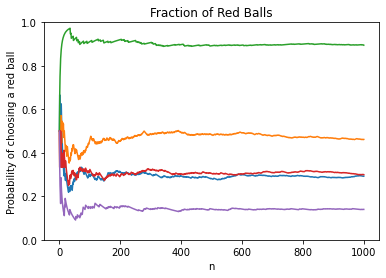

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import *

# loop over simulations 5 times for the 5 seperate runs
for k in range(5):
# each run will consist of 1000 steps
    steps = 1000
# r and b represent number of red and blue balls respectively
    r = []
    b = []
# initial conditions are 1 red and 1 blue so append these to list
    r.append(1)
    b.append(1)
    position = []
# for loop for the number of steps set above
    for i in range(steps):
# calculate the proportion of red balls in the bag
        x = sum(r)/(sum(r)+sum(b))
# generate random number between 0 and 1 to simulate randomly choosing ball
        if random()<x:
# add either a red or blue ball depending on the results
            r.append(1)
        else:
            b.append(1)
# append x (the proportion of red balls in the basket)
        position.append(x)
# after repeating 5 times with 1000 steps each time
# we can now plot results
    plt.plot(position)
    plt.ylim(0,1)
    plt.ylabel('Probability of choosing a red ball')
    plt.xlabel('n')
    plt.title('Fraction of Red Balls')

We will investigate the distribution of the random limiting proportion $X_\infty$.  To do this, we will fix a fairly large $n$ (e.g. about $100$), sample $X_n$ a large number of times (e.g. a few thousand) and plot a histogram of the results.  We assume that the distribution of $X_n$ is close to that of $X_\infty$.  Since $X_n$ can only take a finite set of possible values (because it is a fraction with a fixed denominator), we will have to adjust the `bins` argument (and possibly also $n$) so that each bin contains (at least approximately) the same number of these possible values, so that the histogram appears reasonably smooth.

By examining the histogram, we will formulate a conjecture for the formula for the probability density function (pdf) of $X_\infty$, and plot a graph of our conjectured pdf on the same axes to show that it is a good fit.

We will do all this for a bag that initially contains $r$ red and $b$ blue balls, for each of the three cases $$(r,b)=(1,1),(2,1),(2,2).$$  Our answer will consist of three separate plots.

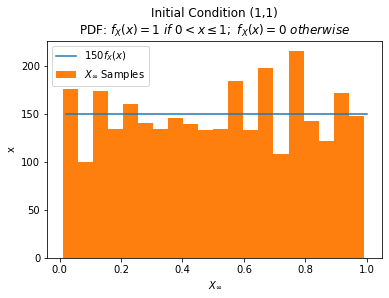

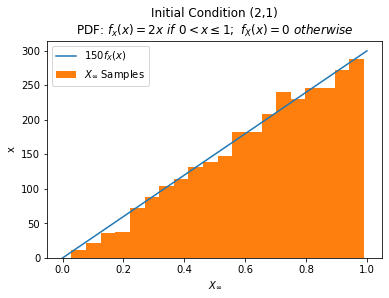

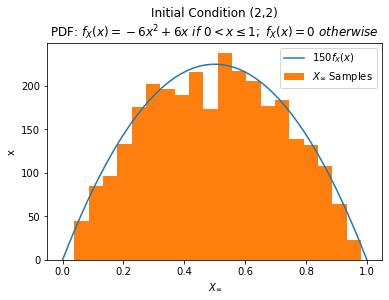

In [2]:
# repeat process above but using only 100 steps each time
# repeat each initial condition 3000 times
# append each limiting value found for X its list
# plot the histogram using the corresponding list

#start with initial conditions (1,1):
Xn11 = []

for k in range(3000):
    steps = 101
    r = []
    b = []
    r.append(1)
    b.append(1)
    position = []
    for i in range(steps):
        x = sum(r)/(sum(r)+sum(b))
        if random()<x:
            r.append(1)
        else:
            b.append(1)
        position.append(x)
    Xn11.append(position[100])
    
def pdf11(x):
    return x//x

n = np.linspace(0,1)[1:]
# we have 3000 runs divided throught 20 bins on our histogram
# 3000/20 = 150 so we multiply our pdf's by 150 to fit onto the graphs of our tests
X = plt.plot(n,pdf11(n)*150)

plt.hist(Xn11, bins = 20)
plt.xlabel(r'$X_{\infty}$')
plt.ylabel('x')
plt.title('Initial Condition (1,1)\nPDF: 'r'$f_{X}(x)=1~if~0<x\leq1;~f_{X}(x)=0~otherwise$')
plt.legend([r'$150f_{X}(x)$', r'$X_{\infty}$'' Samples'])
plt.show()

# for initial conditions (2,1):
Xn21 = []

for k in range(3000):
    steps = 101
    r = []
    b = []
    r.append(2)
    b.append(1)
    position = []
    for i in range(steps):
        x = sum(r)/(sum(r)+sum(b))
        if random()<x:
            r.append(1)
        else:
            b.append(1)
        position.append(x)
    Xn21.append(position[100])
    
def pdf21(x):
    return 2*x

n = np.linspace(0,1)
Y = plt.plot(n,pdf21(n)*150)

plt.hist(Xn21, bins = 20)
plt.xlabel(r'$X_{\infty}$')
plt.ylabel('x')
plt.title('Initial Condition (2,1)\nPDF: 'r'$f_{x}(x)=2x~if~0<x\leq1;~f_{X}(x)=0~otherwise$')
plt.legend([r'$150f_{X}(x)$', r'$X_{\infty}$'' Samples'])
plt.show()

#initial conditions (2,2):
Xn22 = []

for k in range(3000):
    steps = 101
    r = []
    b = []
    r.append(2)
    b.append(2)
    position = []
    for i in range(steps):
        x = sum(r)/(sum(r)+sum(b))
        if random()<x:
            r.append(1)
        else:
            b.append(1)
        position.append(x)
    Xn22.append(position[100])

def pdf22(x):
        return -6*x**2 + 6*x

n = np.linspace(0,1)
Z = plt.plot(n,pdf22(n)*150)
plt.hist(Xn22, bins = 20)
plt.xlabel(r'$X_{\infty}$')
plt.ylabel('x')
plt.title('Initial Condition (2,2)\nPDF: 'r'$f_{X}(x)=-6x^2+6x~if~0<x\leq1;~f_{X}(x)=0~otherwise$')
plt.legend([r'$150f_{X}(x)$', r'$X_{\infty}$'' Samples'])
plt.show()

Let $T$ be the number of steps until the first time a red ball is chosen. We will use repeated sampling to estimate the mean of the random variable $T$ for a bag that initially contains $r$ red and $b$ blue balls, for each of the four cases $$(r,b)=(1,1),(1,2),(2,1),(2,2).$$ 
In each case, we will formulate a conjecture for the exact mean of $T$, based on our experiments.  In each case the exact answer is either an integer or infinity.  We will store our conjecture answers in four variables `mean_1_1`, `mean_1_2`, `mean_2_1`, `mean_2_2` respectively.

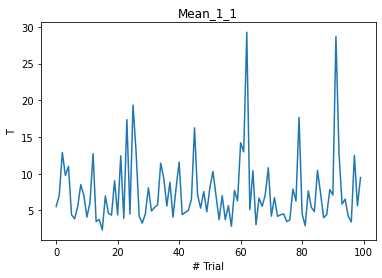

7.5188


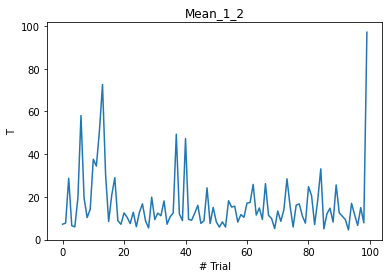

16.583199999999998


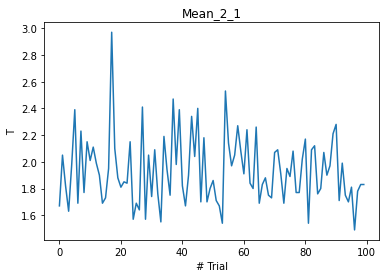

1.9349000000000003


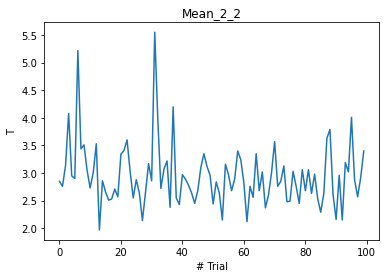

2.9467000000000003


In [5]:
# Rough Work

# mean_1_1:

# We will plot 100 estimates of the mean value
graph_1_1 = []
for j in range(100):
# For each estimate we run the trial 100 times
    result_1_1 = []
    for k in range(100):
        r = []
        b = []
# Our initial conditions are 1 red and 1 blue
        r.append(1)
        b.append(1)
        position = []
# We will run a loop until there are 2 red balls
        while len(r) < 2:
            x = sum(r)/(sum(r)+sum(b))
            if random()<x:
                r.append(1)
            else:
                b.append(1)
            position.append(x)
# we will count the length of the loop 
# i.e how many trials it took to get the first red ball
        result_1_1.append(len(position))
    av_1_1 = np.mean(result_1_1)
    graph_1_1.append(av_1_1)
plt.plot(graph_1_1)
plt.ylabel('T')
plt.xlabel('# Trial')
plt.title('Mean_1_1')
plt.show()
mean_1_1_estimate = np.mean(graph_1_1)
print(mean_1_1_estimate)
# analysis of the graph plotted shows that T goes
# arbitarily high everytime
# therefore, we conclude its mean is infinity


# mean_1_2:
# we repeat the steps taken for mean_1_1 above
# adjusted inital conditions and while loop cut-out

graph_1_2 = []
for j in range(100):
    result_1_2 = []
    for k in range(100):
        r = []
        b = []
        r.append(1)
        b.append(1)
        b.append(1)
        position = []
        while len(r) < 2:
            x = sum(r)/(sum(r)+sum(b))
            if random()<x:
                r.append(1)
            else:
                b.append(1)
            position.append(x)   
        result_1_2.append(len(position))
    av_1_2 = np.mean(result_1_2)
    graph_1_2.append(av_1_2)
plt.plot(graph_1_2)
plt.ylabel('T')
plt.xlabel('# Trial')
plt.title('Mean_1_2')
plt.show()
mean_1_2_estimate = np.mean(graph_1_2)
print(mean_1_2_estimate)

# as with mean_1_1, analysis of the graph shows
# each time T goes arbitarily high
# therefore, we conclude its mean is also infinity


# mean_2_1:
# repeat same step and adjust conditions accordingly

graph_2_1 = []
for j in range(100):
    result_2_1 = []
    for k in range(100):
        r = []
        b = []
        r.append(1)
        r.append(1)
        b.append(1)
        position = []
        while len(r) < 3:
            x = sum(r)/(sum(r)+sum(b))
            if random()<x:
                r.append(1)
            else:
                b.append(1)
            position.append(x)     
        result_2_1.append(len(position))
    av_2_1 = np.mean(result_2_1)
    graph_2_1.append(av_2_1)
plt.plot(graph_2_1)
plt.ylabel('T')
plt.xlabel('# Trial')
plt.title('Mean_2_1')
plt.show()
mean_2_1_estimate = np.mean(graph_2_1)
print(mean_2_1_estimate)

# everytime we run the graph, the mean is approximately 2
# we therefore conclude that the mean is 2


# mean_2_2:
# repeat same steps once again and adjusted conditions accordingly

graph_2_2 = []
for j in range(100):
    result_2_2 = []
    for k in range(100):
        r = []
        b = []
        r.append(1)
        r.append(1)
        b.append(1)
        b.append(1)
        position = []
        while len(r) < 3:
            x = sum(r)/(sum(r)+sum(b))
            if random()<x:
                r.append(1)
            else:
                b.append(1)
            position.append(x)
        result_2_2.append(len(position))
    av_2_2 = np.mean(result_2_2)
    graph_2_2.append(av_2_2)
plt.plot(graph_2_2)
plt.ylabel('T')
plt.xlabel('# Trial')
plt.title('Mean_2_2')
plt.show()
mean_2_2_estimate = np.mean(graph_2_2)
print(mean_2_2_estimate)

# everytime we plot the graph the mean is approximately 3
# therefore, we conclude that the mean is 3

In [6]:

mean_1_1 = 'Infinity'
mean_1_2 = 'Infinity'
mean_2_1 = 2
mean_2_2 = 3

In [7]:
for ans in [mean_1_1,mean_1_2,mean_2_1,mean_2_2]:
    assert ans=='Infinity' or ans==int(ans) 